## Import the Package

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

## Read in an ImageImport the Package

This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


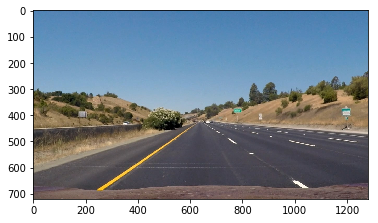

In [3]:
#reading in an image
image = mpimg.imread('test_images/straight_lines1.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

The goals / steps of this project are the following:

- Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
- Apply a distortion correction to raw images.
- Use color transforms, gradients, etc., to create a thresholded binary image.
- Apply a perspective transform to rectify binary image ("birds-eye view").
- Detect lane pixels and fit to find the lane boundary.
- Determine the curvature of the lane and vehicle position with respect to center.
- Warp the detected lane boundaries back onto the original image.
- Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


## First, I'll compute the camera calibration using chessboard images

In [4]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

%matplotlib inline 

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #plt.imshow(img)
        #cv2.imshow('img',img)
        #cv2.waitKey(500)
        
#cv2.destroyAllWindows()

In [142]:
objpoints

[array([[0., 0., 0.],
        [1., 0., 0.],
        [2., 0., 0.],
        [3., 0., 0.],
        [4., 0., 0.],
        [5., 0., 0.],
        [6., 0., 0.],
        [7., 0., 0.],
        [8., 0., 0.],
        [0., 1., 0.],
        [1., 1., 0.],
        [2., 1., 0.],
        [3., 1., 0.],
        [4., 1., 0.],
        [5., 1., 0.],
        [6., 1., 0.],
        [7., 1., 0.],
        [8., 1., 0.],
        [0., 2., 0.],
        [1., 2., 0.],
        [2., 2., 0.],
        [3., 2., 0.],
        [4., 2., 0.],
        [5., 2., 0.],
        [6., 2., 0.],
        [7., 2., 0.],
        [8., 2., 0.],
        [0., 3., 0.],
        [1., 3., 0.],
        [2., 3., 0.],
        [3., 3., 0.],
        [4., 3., 0.],
        [5., 3., 0.],
        [6., 3., 0.],
        [7., 3., 0.],
        [8., 3., 0.],
        [0., 4., 0.],
        [1., 4., 0.],
        [2., 4., 0.],
        [3., 4., 0.],
        [4., 4., 0.],
        [5., 4., 0.],
        [6., 4., 0.],
        [7., 4., 0.],
        [8., 4., 0.],
        [0

In [143]:
imgpoints

[array([[[483.04465, 241.91763]],
 
        [[519.86444, 241.27953]],
 
        [[557.0056 , 241.03136]],
 
        [[594.67615, 239.85266]],
 
        [[632.592  , 239.90636]],
 
        [[670.1497 , 239.44713]],
 
        [[707.95056, 239.05684]],
 
        [[746.02637, 239.04523]],
 
        [[784.00916, 238.9763 ]],
 
        [[483.08945, 279.3426 ]],
 
        [[520.02386, 278.97488]],
 
        [[557.0572 , 278.02255]],
 
        [[595.05566, 277.97116]],
 
        [[632.7761 , 276.77426]],
 
        [[670.1031 , 277.21338]],
 
        [[709.02045, 276.9963 ]],
 
        [[746.592  , 276.96188]],
 
        [[784.00464, 276.9742 ]],
 
        [[483.07324, 316.65372]],
 
        [[520.1652 , 316.13065]],
 
        [[556.92084, 316.00577]],
 
        [[595.06934, 315.27087]],
 
        [[632.94806, 315.03897]],
 
        [[670.93195, 315.02762]],
 
        [[709.1683 , 314.86633]],
 
        [[746.8972 , 314.62527]],
 
        [[784.57404, 314.34885]],
 
        [[482.7999 , 354.313

## I obatined the objpoints and imgpoints for calibration 

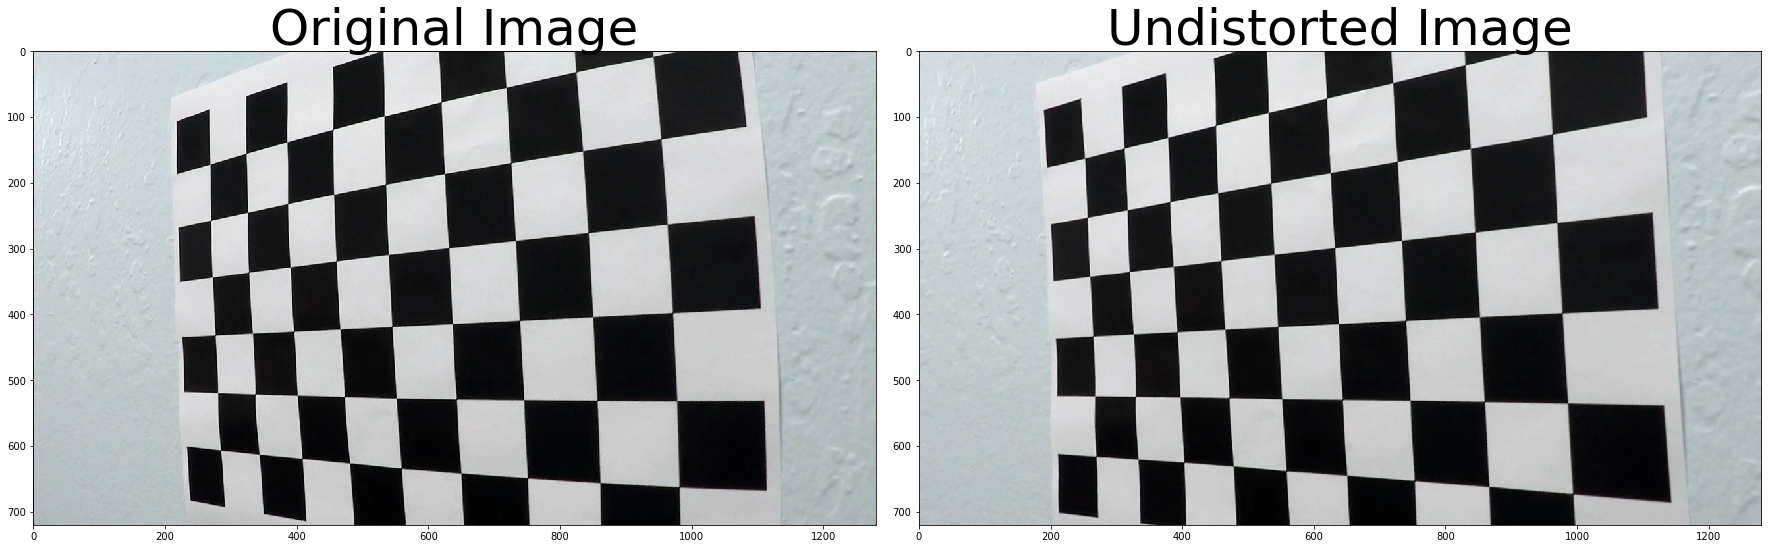

In [5]:
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

img = cv2.imread('camera_cal/calibration4.jpg')
undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig("output_images/undistort_output.png") # To save figure

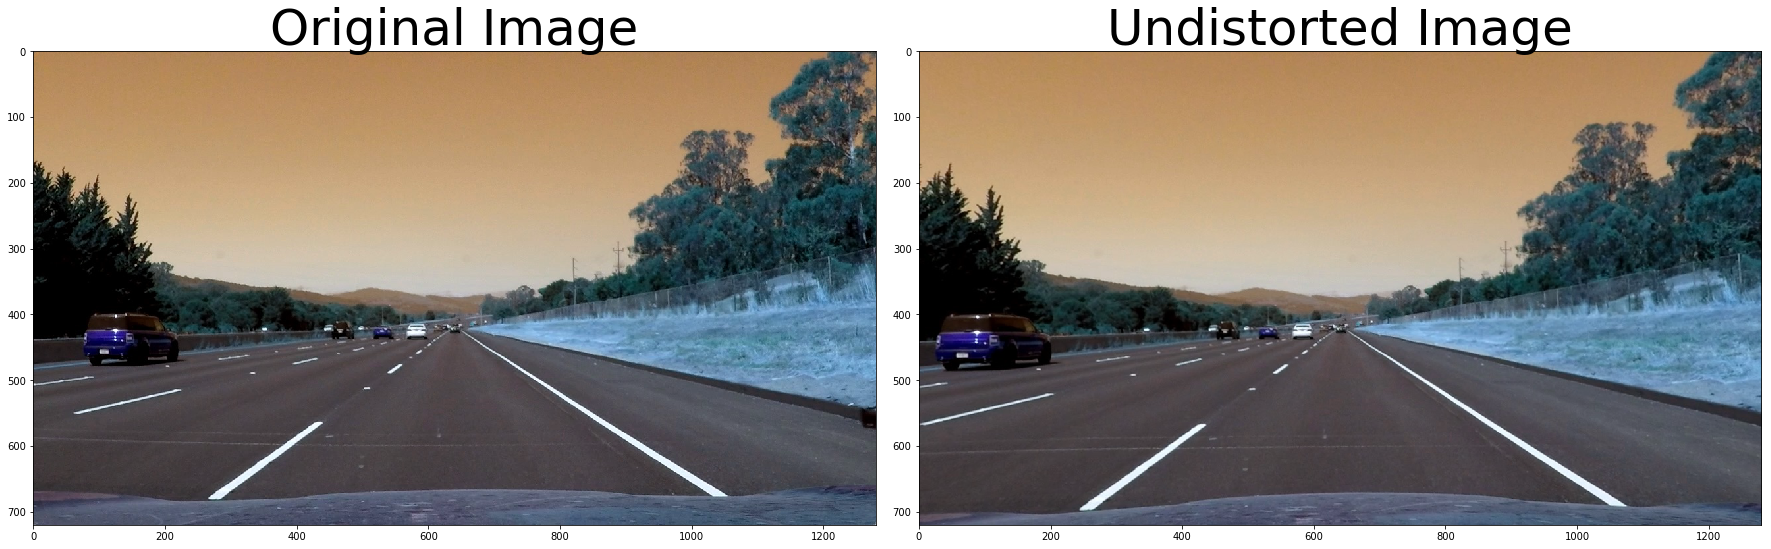

In [6]:
img = cv2.imread('test_images/straight_lines2.jpg')
undistorted = cal_undistort(img, objpoints, imgpoints)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig("output_images/undistort_test1.png") # To save figure

## Use Color Transforms, Gradients, etc., to create a Thresholded Binary Image.

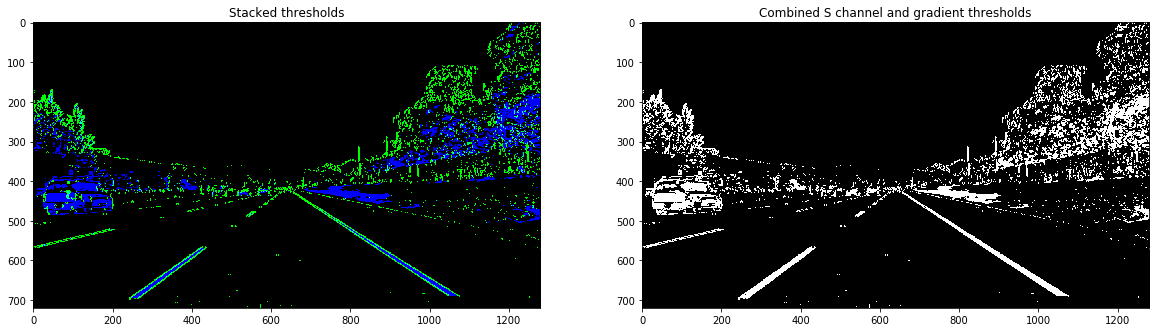

In [13]:
#img = mpimg.imread('test_images/test6.jpg')
img = undistorted
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20 #20
thresh_max = 200 #100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 120 #170
s_thresh_max = 255 #255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')
plt.savefig("output_images/binary_combo_final.png") 

## Apply a perspective transform to rectify binary image ("birds-eye view")


### Find a trapezoidal shape 

In [202]:
img.shape[:] 

(720, 1280, 3)

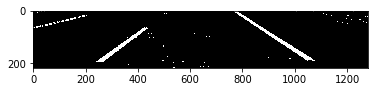

In [216]:
plt.imshow(combined_binary[500:720-1,:],cmap='gray')

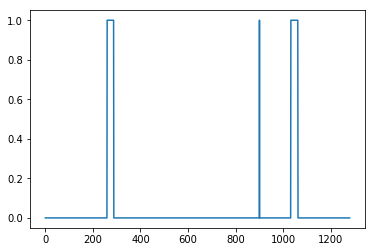

In [240]:
data=combined_binary[680,:]
plt.plot(np.arange(len(data)),data)

In [ ]:
(274,680)  (1046,680)

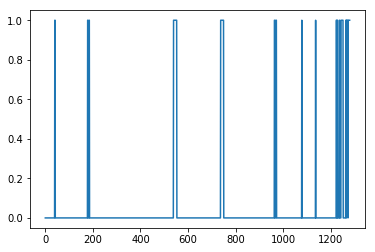

In [246]:
data=combined_binary[485,:]
plt.plot(np.arange(len(data)),data)

In [ ]:
(546,485) (743,485)

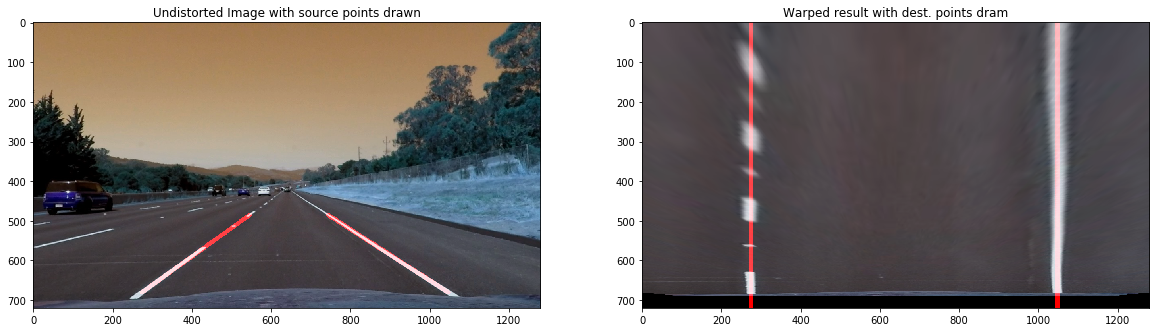

In [15]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    return cv2.addWeighted(initial_img, α, img, β, γ)

image = undistorted            
line_image1 = np.copy(image)*0 # creating a blank to draw lines on
lines1 = [[[274,680,546,485],[1046,680,743,485]]]
draw_lines(line_image1, lines1, color=[255, 0, 0], thickness=10)
lines_edges1 = weighted_img(line_image1, image, 0.9, 1, 0) 
#plt.imshow(lines_edges1, cmap='gray')

src = np.float32([[274,680],[1046,680],[546,485],[743,485]])
dst = np.float32([[274,680],[1046,680],[274,485],[1046,485]])
M = cv2.getPerspectiveTransform(src, dst)
img_size = (undistorted.shape[1], undistorted.shape[0])
warped = cv2.warpPerspective(undistorted, M, img_size)

line_image2 = np.copy(undistorted)*0 # creating a blank to draw lines on
lines2 = [[[274,0,274,719],[1046,0,1046,719]]]
draw_lines(line_image2, lines2, color=[255, 0, 0], thickness=10)
lines_edges2 = weighted_img(line_image2, warped, 0.9, 1, 0) 
#plt.imshow(lines_edges, cmap='gray')

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Undistorted Image with source points drawn')
ax1.imshow(lines_edges1)

ax2.set_title('Warped result with dest. lines drawn')
ax2.imshow(lines_edges2)
plt.savefig("output_images/warped_straight_lines.jpg") 

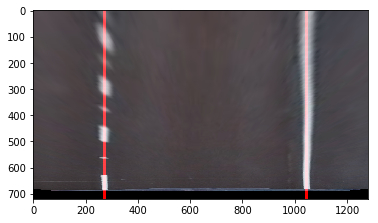

In [260]:
print(M)

[[-6.26050071e-01 -1.52846211e+00  1.03935424e+03]
 [-9.32587341e-15 -1.78580637e+00  7.88634284e+02]
 [-1.30104261e-17 -2.39125010e-03  1.00000000e+00]]


## Detect lane pixels and fit to find the lane boundary.




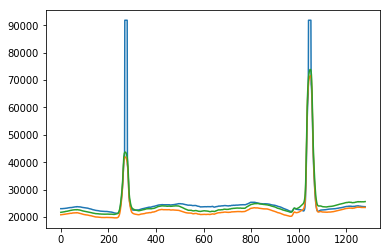

In [289]:
#img = mpimg.imread('warped-example.jpg')/255
img = lines_edges
def hist(img):
    # TO-DO: Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    bottom_half = img[img.shape[0]//2:,:]
    
    # TO-DO: Sum across image pixels vertically - make sure to set `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half, axis=0)
    return histogram

# Create histogram of image binary activations
histogram = np.sum(img[img.shape[0]//2:,:], axis=0)

# Visualize the resulting histogram
plt.plot(histogram)

In [291]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

# Load our image
#binary_warped = mpimg.imread('warped-example.jpg')
binary_warped = lines_edges

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img

out_img = fit_polynomial(binary_warped)
plt.imshow(out_img)

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/core/src/array.cpp:3232: error: (-215:Assertion failed) cn <= 4 in function 'scalarToRawData'


## Determine the curvature of the lane and vehicle position with respect to center.


## Warp the detected lane boundaries back onto the original image.


## Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## Pipeline

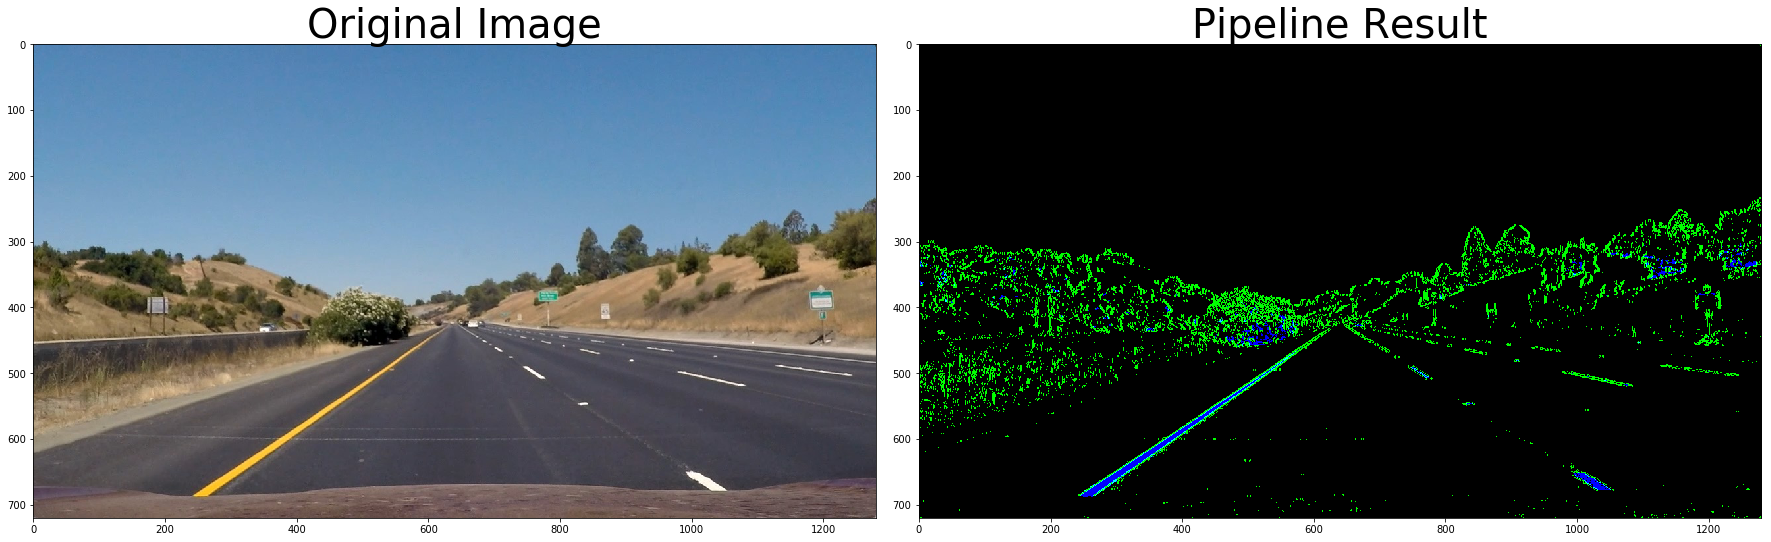

In [8]:
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary
    
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Test on Videos